In [1]:
import astropy.io.ascii
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original = astropy.io.ascii.read('data/starshp.dat', 
                            data_start=33,
                            names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])

In [3]:
# these are cartesian coordinates in the *GALACTIC* system
x = original['X']
y = original['Y']
z = original['Z']

# lets convert them to GALACTIC latitude and longitude
distance = np.sqrt(x**2 + y**2 + z**2)

# this GALACTIC longitude is 0 at the center of the galaxy 
galactic_longitude = np.arctan2(y, x)      # in radians

# GALACTIC latitude is 0 along the galactic equator
galactic_latitude = np.arcsin(z/distance)  # in radians
galactic_latitude[0] = 0

# we can use astropy to create a SkyCoord object containing these positions
from astropy.coordinates import SkyCoord
coord = SkyCoord(galactic_longitude, galactic_latitude, frame='galactic', unit='rad')

# RA and Dec are the CELESTIAL system
celestial_longitude = coord.icrs.ra.rad # in radians
celestial_latitude = coord.icrs.dec.rad # in radians



/Users/zkbt/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


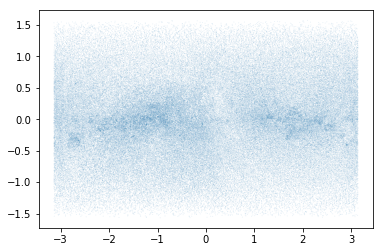

In [8]:
plt.scatter(galactic_longitude, galactic_latitude, edgecolor='none', alpha=0.1, s=1)

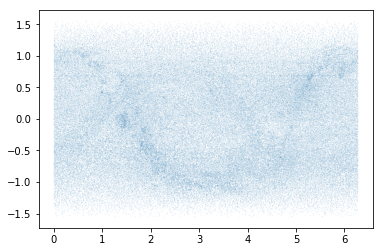

In [9]:
plt.scatter(celestial_longitude, celestial_latitude, edgecolor='none', alpha=0.1, s=1)